# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

In this worksheet we’ll have a further look at `curve_fit()`, in particular in the presence of noisy data.

We will look at simulating the analysis of a continuous gravitational-wave signal from deformed Neutron Stars of the kind analysed in [this paper](https://arxiv.org/pdf/2107.00600.pdf). While we will use a simplified signal, those objects do emit sinusoidal gravitational waves.

To illustrate the effect of the noise, it can be helpful to make animation. Look at the snippet bellow, you will have to tranform it for some of the exercises.

In [2]:
# Some imports for animating.
from matplotlib.animation import FuncAnimation
from IPython import display # This is specific to IPython, upon which jupyter notebooks are built.

In [3]:
# Creating an empty figure
fig = plt.figure()
ax = plt.axes()

# Initialisation of the plot element `line` as empty:
line, = ax.plot([],label='data',color='red')
# We could in general have more than one plot element.

x=np.linspace(0,2*np.pi,100)

# Setting axes so they don't move from frame to frame
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.1,1.1)

# The anination function, which gets run for each frame, with a
# different frame number. It has to accept as input a single
# frame number, and replace the data for each frame number
def animate(frame_num):

    # This function updated the data of the line element.
    # In this example we have a sine wave, but this could
    # be anything that depends on the frame number.
    line.set_data(x,np.sin(x+frame_num/100))
    return line

# Animation function, for `frames` number of frame, with `interval` ms
# between frames.
anim=FuncAnimation(fig,animate,frames=100, interval=20)

# And display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See the bottom of the worksheet for Exercise 0, solved on video available on LearningCentral.

## Exercise 1

1. [2] Write a function that returns a sinusoid signal, in the form that can be used by curve_fit(). It should take as input an array of time values, and be parametrised by an amplitude, a frequency and a phase. You should be able to reuse the function you wrote for Exercise 1 in week 2.

    Plot the resulting signal from calling that function with unit amplitude, unit frequency, zero phase over an array of time from 0 to 10, with at least 100 points. In this example, we are using arbitrary units where all the quantities become numbers close to 1. This is a common technique to avoid large dynamic ranges in the numbers used by the program.

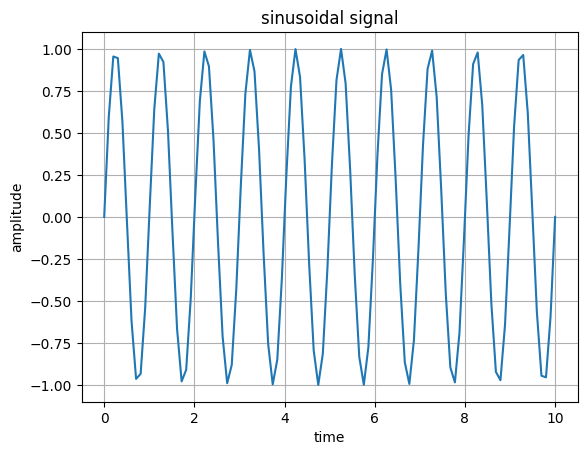

In [8]:
def sinusoid_signal(time, amplitude=1, frequency=1, phase=0):
  return amplitude*np.sin(2*np.pi*frequency*time+phase)

t = np.linspace(0,10,100)
sine_wave_default = sinusoid_signal(t)

plt.figure()
plt.plot(t,sine_wave_default)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('sinusoidal signal')
plt.grid()
plt.show()




2. [2] The signal from 1) with unit amplitude, unit frequency and zero phase will be our reference signal. We are now trying to see how much noise can be added until we have troubles recovering it. This could for instance help set an experiment's requirement.

    Create a function that returns random Gaussian noise, centered around zero, and with the same number of points as in an array of time values. The function should take as input the standard deviation of the noise, and something to tell how many points are needed: either 1) the number of points to generate directly, or 2) an array to take the length of.

    Plot the noise obtained from that function with unit standard deviation on top of the signal from the question above, as a function of the same time array.

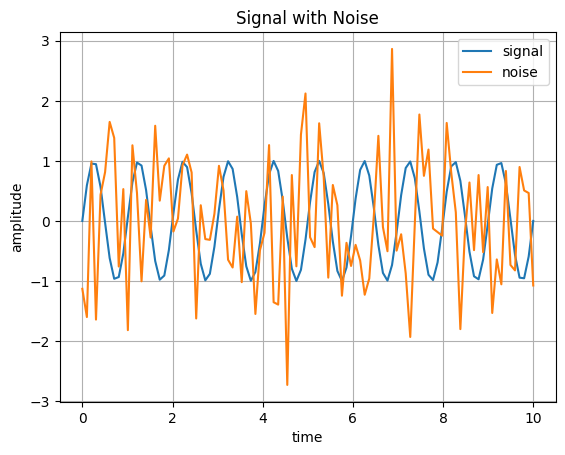

In [11]:
def gaussian_noise(num_points, std_dev=1):
  """Generates random Gaussian noise.

  Args:
    num_points: The number of points to generate.
    std_dev: The standard deviation of the noise.

  Returns:
    An array of random Gaussian noise values.
  """
  return np.random.normal(0, std_dev, num_points)

# Plot the noise on top of the signal
noise = gaussian_noise(len(t))

plt.figure()
plt.plot(t, sine_wave_default, label='signal')
plt.plot(t, noise, label='noise')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Signal with Noise')
plt.legend()
plt.grid()
plt.show()

3. [2] Putting things together, create a function with the following call signature:
   
   ```python
   gen_data(t,signal,sigma_noise=1)
   ```
   Which returns the sum of the signal and noise generated with `sigma_noise` as its standard deviation, using the functions you wrote in question 1) and in question 2). Plot the result  few times (i.e. for a few different random noises), with the reference signal.

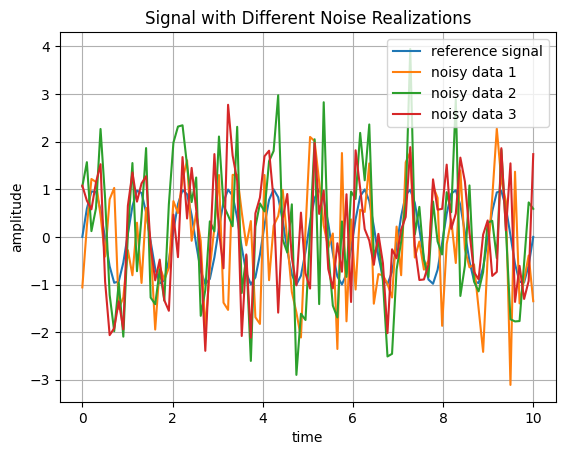

In [13]:
def gen_data(t, signal, sigma_noise=1):
  """Generates data by adding Gaussian noise to a signal.

  Args:
    t: The time array.
    signal: The signal array.
    sigma_noise: The standard deviation of the noise.

  Returns:
    An array of the signal with added noise.
  """
  noise = gaussian_noise(len(t), sigma_noise)
  return signal + noise

# Plot the result a few times with different random noises
plt.figure()
plt.plot(t, sine_wave_default, label='reference signal')
for i in range(3):
  noisy_data = gen_data(t, sine_wave_default, sigma_noise=1)
  plt.plot(t, noisy_data, label=f'noisy data {i+1}')

plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Signal with Different Noise Realizations')
plt.legend()
plt.grid()
plt.show()

4. [4] We will now run `curve_fit()` on the data we created, and see how well we can recover our reference signal. Create some data by using `gen_data()` to generate data with our reference signal added to random Gaussian noise of unit standard deviation.

    First, plot this data with the reference signal and a fitting signal from your sinusoid function from Exercise 1 that is a bit offset from the true signal values.

    Then, run `curve_fit()` on the data with the signal model. Plot and print the result.

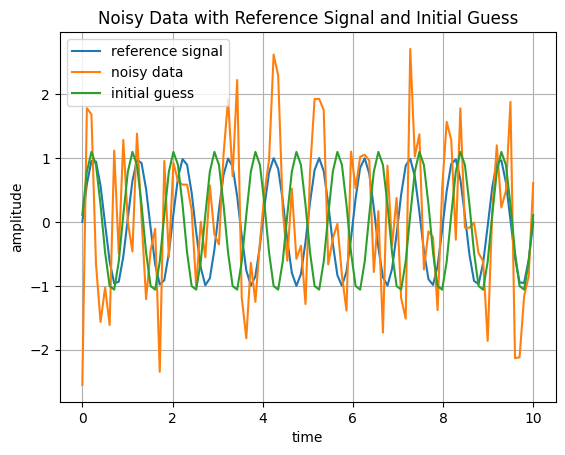

Fitted Parameters:
Amplitude: 0.9187 +/- 0.1398
Frequency: 0.9808 +/- 0.0085
Phase: 7.0410 +/- 0.3077


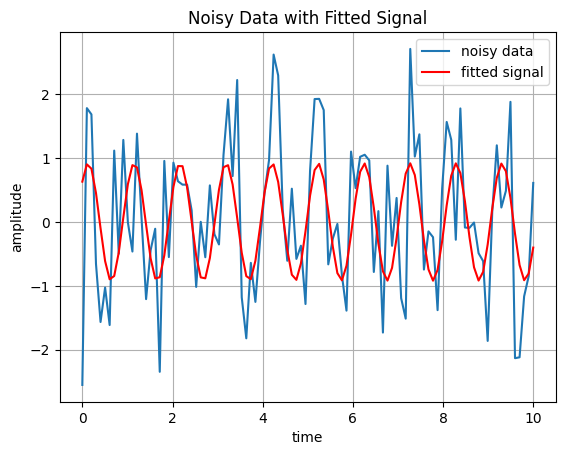

In [14]:
from scipy.optimize import curve_fit

# Generate data with noise
noisy_data = gen_data(t, sine_wave_default, sigma_noise=1)

# Plot the noisy data with the reference signal and an offset fitting signal
plt.figure()
plt.plot(t, sine_wave_default, label='reference signal')
plt.plot(t, noisy_data, label='noisy data')

# Define an initial guess for the fitting parameters (amplitude, frequency, phase)
# Offset the initial guess slightly from the true values
initial_guess = [1.1, 1.1, 0.1]
plt.plot(t, sinusoid_signal(t, *initial_guess), label='initial guess')

plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Noisy Data with Reference Signal and Initial Guess')
plt.legend()
plt.grid()
plt.show()

# Run curve_fit on the data with the signal model
params, covariance = curve_fit(sinusoid_signal, t, noisy_data, p0=initial_guess)

# Extract the fitted parameters
amplitude_fit, frequency_fit, phase_fit = params

# Print the fitted parameters and their uncertainties
print("Fitted Parameters:")
print(f"Amplitude: {amplitude_fit:.4f} +/- {np.sqrt(covariance[0, 0]):.4f}")
print(f"Frequency: {frequency_fit:.4f} +/- {np.sqrt(covariance[1, 1]):.4f}")
print(f"Phase: {phase_fit:.4f} +/- {np.sqrt(covariance[2, 2]):.4f}")


# Plot the noisy data with the fitted signal
plt.figure()
plt.plot(t, noisy_data, label='noisy data')
plt.plot(t, sinusoid_signal(t, *params), label='fitted signal', color='red')

plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('Noisy Data with Fitted Signal')
plt.legend()
plt.grid()
plt.show()

5. [2] From the amplitude $a$ of the signal and its frequency $f$, we can compute the quantity:
$\frac{a}{f^2}$. Which, if we can find out the distance between us and the Neutron Star at the source of this signal, is a useful quantity to infer the star's mass quadrupole moment (and its moment of inertia).

    Use the `uncertainties` package to propagate the uncertainties measured by `curve_fit()` into the uncertainties for $\frac{a}{f^2}$.

In [19]:
!pip install uncertainties

from uncertainties import ufloat

# Create uncertain quantities for amplitude and frequency
# The values are the fitted parameters, and the uncertainties are the square roots of the diagonal elements of the covariance matrix
amplitude_u = ufloat(amplitude_fit, np.sqrt(covariance[0, 0]))
frequency_u = ufloat(frequency_fit, np.sqrt(covariance[1, 1]))

# Calculate the quantity a/f^2 with propagated uncertainties
a_over_f_squared = amplitude_u / (frequency_u**2)

# Print the result with uncertainty
print(f"a/f^2: {a_over_f_squared}")

a/f^2: 0.96+/-0.15


6. [4] Repeat the process above (create noise, create data=signal+noise, fit the data) with different `sigma_noise` values. Try to see what values are reached before the uncertainty of the fit obtained with `curve_fit()` becomes very large. Illustrate this with an animation, choosing appropriate values.

In [20]:
def fit_noisy_data(t, signal, sigma_noise):
  """Generates noisy data, performs curve fitting, and returns fitted parameters and uncertainties.

  Args:
    t: The time array.
    signal: The signal array.
    sigma_noise: The standard deviation of the noise.

  Returns:
    A tuple containing:
      - params: The fitted parameters (amplitude, frequency, phase).
      - uncertainties: The uncertainties of the fitted parameters.
  """
  noisy_data = gen_data(t, signal, sigma_noise)
  initial_guess = [1.1, 1.1, 0.1] # Using a slightly offset initial guess
  try:
    params, covariance = curve_fit(sinusoid_signal, t, noisy_data, p0=initial_guess)
    uncertainties = np.sqrt(np.diag(covariance))
    return params, uncertainties
  except RuntimeError:
    print(f"Could not fit for sigma_noise = {sigma_noise}")
    return [np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan] # Return NaN if fit fails

In [21]:
# Iterate through different noise levels and store results
sigma_noise_values = np.linspace(0.1, 5.0, 20) # Adjust the range and number of points as needed
fitted_params = []
fitted_uncertainties = []

for sigma_noise in sigma_noise_values:
  params, uncertainties = fit_noisy_data(t, sine_wave_default, sigma_noise)
  fitted_params.append(params)
  fitted_uncertainties.append(uncertainties)

# Convert lists to numpy arrays for easier analysis
fitted_params = np.array(fitted_params)
fitted_uncertainties = np.array(fitted_uncertainties)

# Analyze uncertainty (you can print or plot the uncertainties)
print("Uncertainties of Fitted Parameters vs. Noise Level:")
for i, sigma_noise in enumerate(sigma_noise_values):
  print(f"Sigma Noise: {sigma_noise:.2f}, Amplitude Uncertainty: {fitted_uncertainties[i, 0]:.4f}, Frequency Uncertainty: {fitted_uncertainties[i, 1]:.4f}, Phase Uncertainty: {fitted_uncertainties[i, 2]:.4f}")

Uncertainties of Fitted Parameters vs. Noise Level:
Sigma Noise: 0.10, Amplitude Uncertainty: 0.0978, Frequency Uncertainty: 0.0293, Phase Uncertainty: 1.0635
Sigma Noise: 0.36, Amplitude Uncertainty: 0.1071, Frequency Uncertainty: 0.0311, Phase Uncertainty: 1.1413
Sigma Noise: 0.62, Amplitude Uncertainty: 0.1370, Frequency Uncertainty: 0.0387, Phase Uncertainty: 1.4063
Sigma Noise: 0.87, Amplitude Uncertainty: 0.1575, Frequency Uncertainty: 0.0339, Phase Uncertainty: 1.2262
Sigma Noise: 1.13, Amplitude Uncertainty: 0.2092, Frequency Uncertainty: 0.0203, Phase Uncertainty: 0.7419
Sigma Noise: 1.39, Amplitude Uncertainty: 0.2306, Frequency Uncertainty: 0.0126, Phase Uncertainty: 0.4606
Sigma Noise: 1.65, Amplitude Uncertainty: 0.2293, Frequency Uncertainty: 0.0311, Phase Uncertainty: 1.1412
Sigma Noise: 1.91, Amplitude Uncertainty: 0.2664, Frequency Uncertainty: 0.0233, Phase Uncertainty: 0.8497
Sigma Noise: 2.16, Amplitude Uncertainty: 0.3344, Frequency Uncertainty: 0.0321, Phase Uncer

In [22]:
# Create an empty figure for the animation
fig, ax = plt.subplots()

# Initialisation of the plot elements
line_noisy_data, = ax.plot([], [], 'o', label='noisy data', markersize=2)
line_fitted_signal, = ax.plot([], [], label='fitted signal', color='red')
line_reference_signal, = ax.plot(t, sine_wave_default, label='reference signal', linestyle='--')

# Setting axes so they don't move from frame to frame
ax.set_xlim(min(t), max(t))
ax.set_ylim(-3, 3) # Adjust limits based on expected data range

# Add labels and title
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.set_title('Curve Fitting with Increasing Noise')
ax.legend()
ax.grid(True)

# The animation function
def animate(frame_num):
    sigma_noise = sigma_noise_values[frame_num]
    noisy_data = gen_data(t, sine_wave_default, sigma_noise)
    params, uncertainties = fit_noisy_data(t, sine_wave_default, sigma_noise)

    line_noisy_data.set_data(t, noisy_data)
    line_fitted_signal.set_data(t, sinusoid_signal(t, *params))
    ax.set_title(f'Curve Fitting with Noise (sigma = {sigma_noise:.2f})')

    return line_noisy_data, line_fitted_signal,

# Animation function
anim = FuncAnimation(fig, animate, frames=len(sigma_noise_values), interval=200, blit=True)

# Display the animation
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Based on the analysis and the animation, we can observe that as the noise level (sigma_noise) increases, the uncertainty in the fitted parameters (amplitude, frequency, and phase) also generally increases. This leads to the fitted signal deviating more significantly from the true reference signal. There appears to be a point where the uncertainties become very large, indicating that curve_fit struggles to accurately recover the original signal parameters in the presence of high noise. The exact threshold for "very large" uncertainty would depend on the specific requirements of the analysis.



## Exercise 2

Gravitational waves have two polarisations, usually called $h_+(t)$ and $h_{\times}(t)$. Is is convenient to write a gravitational wave as a complex time series $h(t)=h_+(t)+ih_{\times}(t)$, with the polarisation angle then the argument of the complex numbers.

1. [1] Write a function that, from an amplitude $A$, a frequency $f$ and a phase $\phi$ generates the complex time series:

$$
h(t)=A\,\exp(i(2\pi f t + \phi))
$$

In [23]:
def grav_wave(t, amplitude=1, frequency=1, phase=0):
  return amplitude*np.exp(1j*(2*np.pi*frequency*t+phase))

Based on the analysis and the animation, we can observe that as the noise level (`sigma_noise`) increases, the uncertainty in the fitted parameters (amplitude, frequency, and phase) also generally increases. This leads to the fitted signal deviating more significantly from the true reference signal. There appears to be a point where the uncertainties become very large, indicating that `curve_fit` struggles to accurately recover the original signal parameters in the presence of high noise. The exact threshold for "very large" uncertainty would depend on the specific requirements of the analysis.

2. [1] Make a 3D plot of that function for $A=1,f=1,\phi=0$, using the axes $(\text{Real}(h(t)),\text{Imag}(h(t)),t)$. To make a 3D plot, of, say, the arrays `x`, `y` and `z` you can use:

```python
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
```

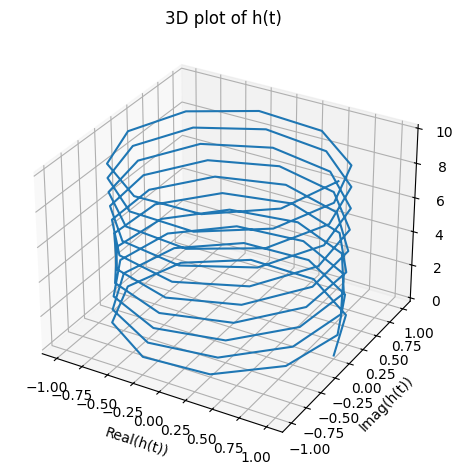

In [29]:
from mpl_toolkits import mplot3d
import numpy as np # Import numpy if not already imported for t

# Generate the complex gravitational wave data
t = np.linspace(0, 10, 100) # Assuming a time array similar to Exercise 1
h = grav_wave(t, amplitude=1, frequency=1, phase=0)

# Extract real and imaginary parts
h_real = np.real(h)
h_imag = np.imag(h)

# Create the 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(h_real, h_imag, t)

# Add labels
ax.set_xlabel('Real(h(t))')
ax.set_ylabel('Imag(h(t))')
ax.set_zlabel('t')
ax.set_title('3D plot of h(t)')

# Improve layout to prevent labels from overlapping
fig.tight_layout()

plt.show()

3. [2] Create an animation of the plot by varying the phase. You have to make the animation code from above work with a 3D figure. You can replace `line.set_data()` with `line.set_data_3d()`.

In [31]:
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits import mplot3d

# Creating an empty figure
fig = plt.figure()
ax = plt.axes(projection='3d')

# Initialisation of the plot element `line` as empty:
line, = ax.plot3D([], [], []) # Use plot3D for 3D line
# We could in general have more than one plot element.

t = np.linspace(0, 10, 100) # Time array

# Setting axes so they don't move from frame to frame
ax.set_xlim3d([-1.1, 1.1]) # Adjust limits based on expected amplitude
ax.set_ylim3d([-1.1, 1.1]) # Adjust limits based on expected amplitude
ax.set_zlim3d([min(t), max(t)]) # Set z-axis limits based on time

# Add labels
ax.set_xlabel('Real(h(t))')
ax.set_ylabel('Imag(h(t))')
ax.set_zlabel('t')
ax.set_title('3D Animation of h(t) with Varying Phase')


# The animation function, which gets run for each frame, with a
# different frame number. It has to accept as input a single
# frame number, and replace the data for each frame number
def animate(frame_num):
    # Calculate the phase based on the frame number
    phase = 2 * np.pi * (frame_num / 100) # Vary phase from 0 to 2*pi

    # Generate the complex gravitational wave data with varying phase
    h = grav_wave(t, amplitude=1, frequency=1, phase=phase)

    # Update the data of the line element with the new complex data
    line.set_data_3d(np.real(h), np.imag(h), t) # Use set_data_3d for 3D data
    return line,

# Animation function, for `frames` number of frame, with `interval` ms
# between frames.
anim = FuncAnimation(fig, animate, frames=100, interval=50, blit=True) # Adjust frames and interval as needed

# And display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## Exercise 0

[0] When we know the data we are trying to fit with `curve_fit()` is more noisy in some places, we can use [`curve_fit()`'s weighted least squares fitting](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). To illustrate this, create a fitting function for a [Lorentzian line shape function](https://en.wikipedia.org/wiki/Spectral_line_shape#Lorentzian). This is often used in gravitational-wave detectors to model lines in the noise spectrum.

$$
line(f)=\frac{A\,\gamma^2}{\gamma^2+(f-f_0)^2}
$$

Over a frequency array from 1 to 20 and at least 100 frequencies, generate:
- a Lorentzian signal with $A=3,\gamma=5,f_0=12$ (arbitrary units)
- Gaussian noise with a standard deviation of $1$ everywhere except for a window from $f=10$ to $f=14$ where the noise is higher, with a standard deviation of $5$.
- perform the fit with and without weights (the `sigma` argument in `curve_fit()`), running the program until you see a good illustation of weighted least squares fitting.

(this exercise is for demonstration purposes and won't be marked)

# Task
Analyze the effect of noise on curve fitting by generating noisy data, performing fits, and visualizing the results with an animation.

## Define a function to perform the fitting

### Subtask:
Create a function that takes the time array, signal, and noise standard deviation as input, generates the noisy data, performs the curve fit, and returns the fitted parameters and their uncertainties.


**Reasoning**:
Define a function to generate noisy data, perform curve fitting, and return the fitted parameters and their uncertainties as requested by the subtask instructions.

